In [15]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
df = pd.merge(city, ride, on = 'city')
df = df.sort_values('city')
# Display the data table for preview

In [16]:
df.head()

,city,driver_count,type,date,fare,ride_id
1523,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
1522,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
1529,Amandaburgh,12,Urban,2018-03-13 12:52:31,13.88,6222134922674
1524,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492
1525,Amandaburgh,12,Urban,2018-04-19 16:30:12,6.27,4400632718421


## Bubble Plot of Ride Sharing Data

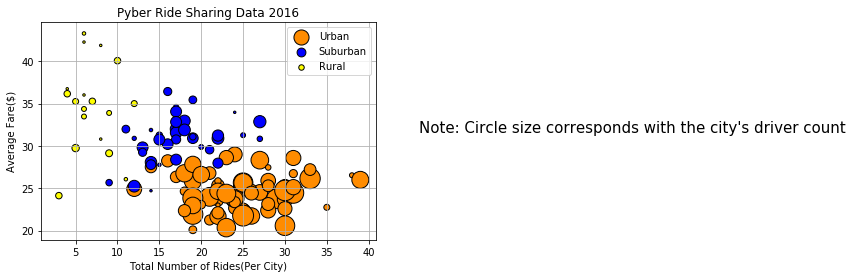

In [84]:
# Obtain the x and y coordinates for each of the three city types
urban = df.loc[df["type"] == "Urban", :]
suburban = df.loc[df["type"] == "Suburban", :]
rural = df.loc[df["type"] == "Rural", :]


city_urban = urban.groupby(['city'])
city_suburban = suburban.groupby(['city'])
city_rural = rural.groupby(['city'])

ridecount_urban = urban['city'].value_counts().sort_index()
ridecount_rural = rural['city'].value_counts().sort_index()
ridecount_suburban = suburban['city'].value_counts().sort_index()


driver_urban = city_urban['driver_count'].mean()
driver_suburban = city_suburban['driver_count'].mean()
driver_rural = city_rural['driver_count'].mean()

fare_urban = city_urban['fare'].sum() / ridecount_urban
fare_suburban = city_suburban['fare'].sum() / ridecount_suburban
fare_rural = city_rural['fare'].sum() / ridecount_rural

# Build the scatter plots for each city types
legend_1 = plt.scatter(ridecount_urban, fare_urban, facecolors="darkorange", edgecolor="black", s=driver_urban*6)
legend_2 = plt.scatter(ridecount_suburban, fare_suburban, facecolors="blue", edgecolors="black", s=driver_suburban*6)
legend_3 = plt.scatter(ridecount_rural, fare_rural, facecolors="yellow",edgecolors="black", s=driver_rural*6)
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.grid()
# Create a legend
plt.legend((legend_1, legend_2, legend_3), ('Urban', 'Suburban', 'Rural'))   
# Incorporate a text label regarding circle size
plt.text(1,0.5, "Note: Circle size corresponds with the city's driver count", fontsize=15, transform=plt.gcf().transFigure)
# Save Figure
plt.savefig("PyberGraph.png")

In [59]:
# Show plot
plt.show()

## Total Fares by City Type

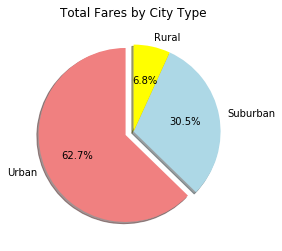

In [48]:
# Calculate Type Percents
fare_urban = urban_df['fare'].sum()
fare_suburban = suburban_df['fare'].sum()
fare_rural = rural_df['fare'].sum()

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]

sizes = [fare_urban, fare_suburban, fare_rural]

colors = ["lightcoral", "lightblue", "yellow"]

explode = (.1,0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Total Fares by City Type")

# Save Figure
plt.savefig("Totalfare.png")

In [49]:
# Show Figure
plt.show()

## Total Rides by City Type

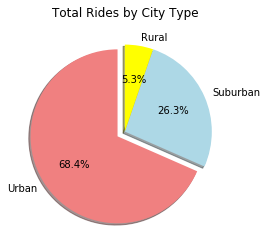

In [50]:
# Calculate Ride Percents
pie_rides_urban = urban_df['city'].count()
pie_rides_suburban = suburban_df['city'].count()
pie_rides_rural = rural_df['city'].count()

# Build Pie Chart
sizes_2 = [pie_rides_urban, pie_rides_suburban, pie_rides_rural]

plt.pie(sizes_2, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Total Rides by City Type")

# Save Figure
plt.savefig("TotalRides")


In [52]:
# Show Figure
plt.show()

## Total Drivers by City Type

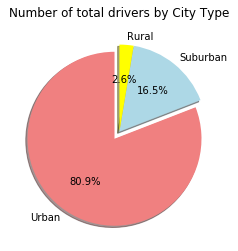

In [56]:
# Calculate Driver Percents
pie_drivers_urban = (city_urban['driver_count'].sum() / city_urban['city'].count()).sum()
pie_drivers_rural = (city_rural['driver_count'].sum() / city_rural['city'].count()).sum()
pie_drivers_suburban = (city_suburban['driver_count'].sum() / city_suburban['city'].count()).sum()

# Build Pie Charts
sizes_3 = [pie_drivers_urban, pie_drivers_suburban, pie_drivers_rural]

plt.pie(sizes_3, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Number of total drivers by City Type")

# Save Figure
plt.savefig("TotalDrivers")
plt.show()

In [57]:
# Show Figure
plt.show()